In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [2]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []

    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i:i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [3]:
target_stock = "SAMSUNG_SDI"

In [4]:
df = pd.read_csv(f"../data_dir/train_{target_stock}_0619.csv")
df["Medium"] = df[["High", "Low"]].mean(axis = 1)
feature_Df = df[["High", "Low", "Open", "Medium"]]
target_Df = df["Close"]
train_Feature, train_Label = make_dataset(feature_Df, target_Df)

In [5]:
feature = 4
timesteps = 5
cell_size = 16
#learning_rate = 0.1
batch_size = 32
epochs = 50


input_shape = (timesteps, feature)
model = models.Sequential()
model.add(layers.LSTM(cell_size, input_shape = input_shape,activation="relu", return_sequences = False))
#model.add(layers.Dropout(0.2))
#model.add(layers.LSTM(cell_size))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
optimizer = K.optimizers.Adam() #(lr = learning_rate)
loss_func = K.losses.mse
acc = K.metrics.RootMeanSquaredError
model.compile(optimizer = optimizer, loss = loss_func, metrics = [K.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1344      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_Feature, train_Label, epochs = epochs, batch_size = batch_size)

Epoch 1/50
167/167 [==============================] - 15s 45ms/step - loss: 20401859200.0000 - root_mean_squared_error: 137365.3762
Epoch 2/50
167/167 [==============================] - 7s 45ms/step - loss: 24796224.6310 - root_mean_squared_error: 4975.9202
Epoch 3/50
167/167 [==============================] - 8s 45ms/step - loss: 23972032.4048 - root_mean_squared_error: 4889.1015
Epoch 4/50
167/167 [==============================] - 7s 45ms/step - loss: 23639635.9881 - root_mean_squared_error: 4859.4872
Epoch 5/50
167/167 [==============================] - 8s 45ms/step - loss: 21404699.3452 - root_mean_squared_error: 4620.6896
Epoch 6/50
167/167 [==============================] - 8s 45ms/step - loss: 23502281.7619 - root_mean_squared_error: 4839.0829
Epoch 7/50
167/167 [==============================] - 7s 44ms/step - loss: 21981981.8750 - root_mean_squared_error: 4685.2388
Epoch 8/50
167/167 [==============================] - 7s 45ms/step - loss: 21117391.0238 - root_mean_squared_err

In [7]:
test_df = pd.read_csv(f"../data_dir/test_{target_stock}_0619.csv")
test_df["Medium"] = test_df[["High", "Low"]].mean(axis = 1)
feature_test = test_df[["High", "Low", "Open", "Medium"]]
target_test = test_df["Close"]
test_Feature, test_Label = make_dataset(feature_test, target_test)


In [8]:
pred = model.predict(test_Feature)

In [9]:
pred

array([[662649.25],
       [660727.94],
       [661298.7 ],
       [664165.3 ],
       [668179.  ],
       [679646.8 ],
       [683319.44],
       [692829.94],
       [690913.94],
       [693204.9 ],
       [689709.  ],
       [684950.8 ],
       [679305.5 ],
       [680783.1 ],
       [682209.  ],
       [680229.2 ],
       [678419.4 ],
       [677231.7 ],
       [669673.06],
       [658996.8 ],
       [653871.75],
       [648689.5 ],
       [647302.06],
       [644214.3 ],
       [643763.94],
       [633579.2 ],
       [631495.94],
       [632519.56],
       [626759.2 ],
       [625480.94],
       [633631.06],
       [634615.94],
       [634205.44],
       [637444.3 ],
       [638093.7 ],
       [638409.06],
       [640807.94],
       [631171.6 ],
       [627837.8 ],
       [623241.56],
       [618610.3 ],
       [613829.56],
       [613950.56],
       [611334.3 ],
       [612077.1 ],
       [618268.44],
       [623828.5 ],
       [628080.8 ],
       [635597.7 ],
       [642456.6 ]],

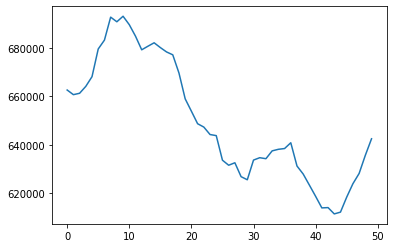

In [10]:
plt.plot(range(len(pred)), pred)

In [11]:
model.save(f"../models/my_model_{target_stock}")

INFO:tensorflow:Assets written to: ../models/my_model_SAMSUNG_SDI/assets
